# Project Objective


Analyze credit card transaction data to identify patterns, assess risk factors, and optimize lending strategies. Explore spending behavior, repayment trends, enabling stakeholders to monitor and analyze credit card operations effectively.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px


In [7]:
cc_details = pd.read_csv('credit_card.csv')

In [9]:
cc_details.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [11]:
cust_details = pd.read_csv('customer.csv')

In [13]:
cust_details.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


# Data Processing

## Adding New Columns

In [15]:
#Adding a Age group column from Customer_Age column
# used lambda function to create this column

cust_details['Age_Group'] = cust_details['Customer_Age'].apply(lambda age: 
                                  '20-30' if age < 30 else 
                                  '30-40' if age >= 30 and  age < 40 else 
                                  '40-50' if age >= 40 and  age < 50 else
                                  '50-60' if age >= 50 and  age < 60 else
                                  '60+' if age >=60 else
                                  'unknown')

In [17]:
cust_details.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score,Age_Group
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3,20-30
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2,60+
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2,30-40
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1,30-40
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1,40-50


In [19]:
#Adding an Income group column from Income column


cust_details['Income_Group'] = cust_details['Income'].apply(lambda income: 
                                  'Low' if income < 35000 else 
                                  'Medium' if income >= 35000 and  income < 70000 else 
                                  'High' if income >=70000 else
                                  'unknown')

In [21]:
cust_details.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score,Age_Group,Income_Group
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3,20-30,High
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2,60+,Low
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2,30-40,Low
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1,30-40,Medium
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1,40-50,Medium


In [23]:
#Adding Revenue column in cc_details
cc_details['Revenue'] = cc_details['Annual_Fees'] + cc_details['Total_Trans_Amt'] + cc_details['Interest_Earned']

In [25]:
cc_details.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Revenue
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0,19742.21
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0,1506.44
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0,1789.58
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0,4426.40
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1,5693.87


In [71]:
#Adding Week Number and Month columns

In [27]:
#change datatype of week_start_date from object to datetime
cc_details.dtypes

Client_Num                 int64
Card_Category             object
Annual_Fees                int64
Activation_30_Days         int64
Customer_Acq_Cost          int64
Week_Start_Date           object
Week_Num                  object
Qtr                       object
current_year               int64
Credit_Limit             float64
Total_Revolving_Bal        int64
Total_Trans_Amt            int64
Total_Trans_Vol            int64
Avg_Utilization_Ratio    float64
Use Chip                  object
Exp Type                  object
Interest_Earned          float64
Delinquent_Acc             int64
Revenue                  float64
dtype: object

In [29]:
cc_details['Week_Start_Date'] = pd.to_datetime(cc_details['Week_Start_Date'], format='%d-%m-%Y')

In [31]:
cc_details.dtypes

Client_Num                        int64
Card_Category                    object
Annual_Fees                       int64
Activation_30_Days                int64
Customer_Acq_Cost                 int64
Week_Start_Date          datetime64[ns]
Week_Num                         object
Qtr                              object
current_year                      int64
Credit_Limit                    float64
Total_Revolving_Bal               int64
Total_Trans_Amt                   int64
Total_Trans_Vol                   int64
Avg_Utilization_Ratio           float64
Use Chip                         object
Exp Type                         object
Interest_Earned                 float64
Delinquent_Acc                    int64
Revenue                         float64
dtype: object

In [33]:
#Adding Month column
cc_details['Month'] = cc_details['Week_Start_Date'].dt.strftime('%B')

#Adding week number column
cc_details['Week_Number'] = (cc_details['Week_Start_Date'] - pd.Timestamp('2023-01-01')).dt.days // 7 + 1


In [35]:
cc_details.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Revenue,Month,Week_Number
0,708082083,Blue,200,0,87,2023-01-01,Week-1,Q1,2023,3544.0,...,15149,111,0.469,Chip,Travel,4393.21,0,19742.21,January,1
1,708083283,Blue,445,1,108,2023-01-01,Week-1,Q1,2023,3421.0,...,992,21,0.736,Swipe,Entertainment,69.44,0,1506.44,January,1
2,708084558,Blue,140,0,106,2023-01-01,Week-1,Q1,2023,8258.0,...,1447,23,0.214,Chip,Bills,202.58,0,1789.58,January,1
3,708085458,Blue,250,1,150,2023-01-01,Week-1,Q1,2023,1438.3,...,3940,82,0.000,Online,Grocery,236.40,0,4426.40,January,1
4,708086958,Blue,320,1,106,2023-01-01,Week-1,Q1,2023,3128.0,...,4369,59,0.239,Swipe,Fuel,1004.87,1,5693.87,January,1


## Merging Two Data Frames

In [37]:
#Merge two dataframes,cc_details and cust_details

merged_df = pd.merge(cc_details, cust_details, on='Client_Num')


In [39]:
merged_df.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,...,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score,Age_Group,Income_Group
0,708082083,Blue,200,0,87,2023-01-01,Week-1,Q1,2023,3544.0,...,91750,no,yes,no,unknown,Businessman,202326,3,20-30,High
1,708083283,Blue,445,1,108,2023-01-01,Week-1,Q1,2023,3421.0,...,91750,no,no,no,cellular,Selfemployeed,5225,2,60+,Low
2,708084558,Blue,140,0,106,2023-01-01,Week-1,Q1,2023,8258.0,...,91750,yes,no,no,unknown,Selfemployeed,14235,2,30-40,Low
3,708085458,Blue,250,1,150,2023-01-01,Week-1,Q1,2023,1438.3,...,91750,no,no,no,cellular,Blue-collar,45683,1,30-40,Medium
4,708086958,Blue,320,1,106,2023-01-01,Week-1,Q1,2023,3128.0,...,91750,yes,yes,no,cellular,Businessman,59279,1,40-50,Medium


# The Analysis

### Total Revenue

In [41]:
#Sum of Revenue
cc_details['Revenue'].sum()

55315410.23

### Total Interest Earned

In [43]:
#Sum of Interest Earned
cc_details['Interest_Earned'].sum().round(2)

7843382.23

### Total Transactions Amount

In [45]:
cc_details['Total_Trans_Amt'].sum()

44522013

### Average Age

In [47]:
cust_details['Customer_Age'].mean().round()

46.0

### Customer Satisfaction Score

In [49]:
cust_details['Cust_Satisfaction_Score'].mean().round(2)

3.19

### Deliquent Rate

In [110]:
Delinquent_Acc = cc_details['Delinquent_Acc'].value_counts()

In [120]:
Delinquent_Acc

Delinquent_Acc
0    9494
1     614
Name: count, dtype: int64

In [114]:
non_Deliquent = (cc_details['Delinquent_Acc'] == 0).sum()
Deliquent = (cc_details['Delinquent_Acc'] == 1).sum()
Delinquent_Acc_Total = Delinquent_Acc.sum()

In [116]:
Delinquent_rate = (Deliquent/Delinquent_Acc_Total)*100

In [118]:
Delinquent_rate.round(2)

6.07

### Activation Rate

In [102]:
Activation = cc_details['Activation_30_Days'].value_counts()

In [104]:
Activation

Activation_30_Days
1    5809
0    4299
Name: count, dtype: int64

In [122]:
non_Activated = (cc_details['Activation_30_Days'] == 0).sum()
Activated = (cc_details['Activation_30_Days'] == 1).sum()
Activation_Total = Activation.sum()

In [124]:
Activation_rate = (Activated/Activation_Total)*100

In [128]:
Activation_rate.round(2)

57.47

### Activation count by Customer Job

In [178]:
Activation_job = merged_df.groupby('Customer_Job')['Activation_30_Days'].value_counts()

In [184]:
Activation_job

Customer_Job   Activation_30_Days
Blue-collar    1                      902
               0                      677
Businessman    1                     1096
               0                      805
Govt           1                      883
               0                      642
Retirees       1                      558
               0                      428
Selfemployeed  1                     1495
               0                     1080
White-collar   1                      875
               0                      667
Name: count, dtype: int64

### Week over Week Change

In [67]:
#current week revenue
wow_revenue = cc_details.groupby('Week_Number')['Revenue'].sum().reset_index()

# Rename the columns
wow_revenue.columns = ['Week Number', 'Current_Week_Revenue']

# previous week's revenue
wow_revenue['Previous_Week_Revenue'] = wow_revenue['Current_Week_Revenue'].shift(1)

#Week over Week change%
wow_revenue['WoW_change'] = (wow_revenue['Current_Week_Revenue'] - wow_revenue['Previous_Week_Revenue']) / wow_revenue['Previous_Week_Revenue'] * 100 

#round the values
wow_revenue['WoW_change'] = wow_revenue['WoW_change'].round(2)

In [69]:
wow_revenue

,Week Number,Current_Week_Revenue,Previous_Week_Revenue,WoW_change
0,1,1035629.32,NaN,NaN
1,2,1053088.81,1035629.32,1.69
2,3,1148249.80,1053088.81,9.04
3,4,1071919.27,1148249.80,-6.65
4,5,1064577.97,1071919.27,-0.68
5,6,1121745.13,1064577.97,5.37
6,7,1099909.39,1121745.13,-1.95
7,8,1071542.29,1099909.39,-2.58
8,9,1093501.86,1071542.29,2.05
9,10,987820.46,1093501.86,-9.66


## Data Visualisation

### *Data visuatisation using Matplotlib and Seaborn*

### Revenue by Card Category

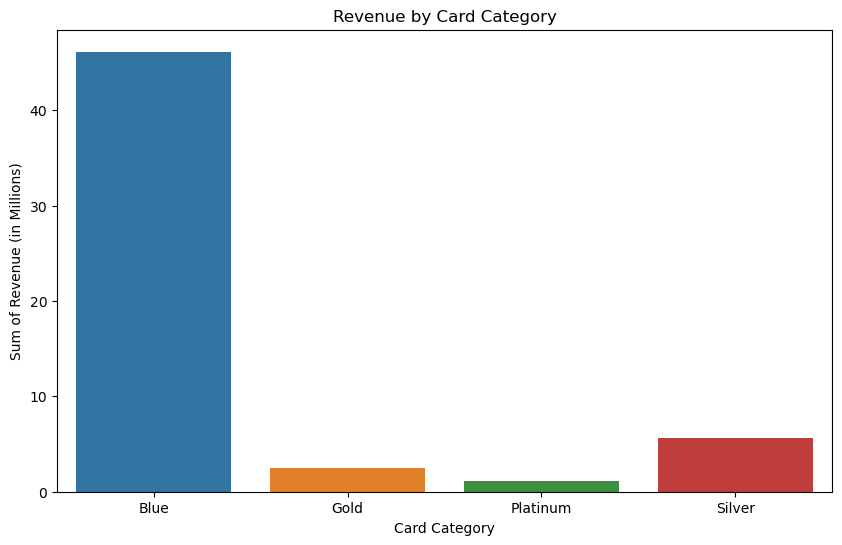

In [103]:
sum_revenue = cc_details.groupby('Card_Category')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sum_revenue, x='Card_Category', y=sum_revenue['Revenue'] / 1e6, hue='Card_Category')
plt.title('Revenue by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Sum of Revenue (in Millions)')
plt.show()

### Revenue by Quarter

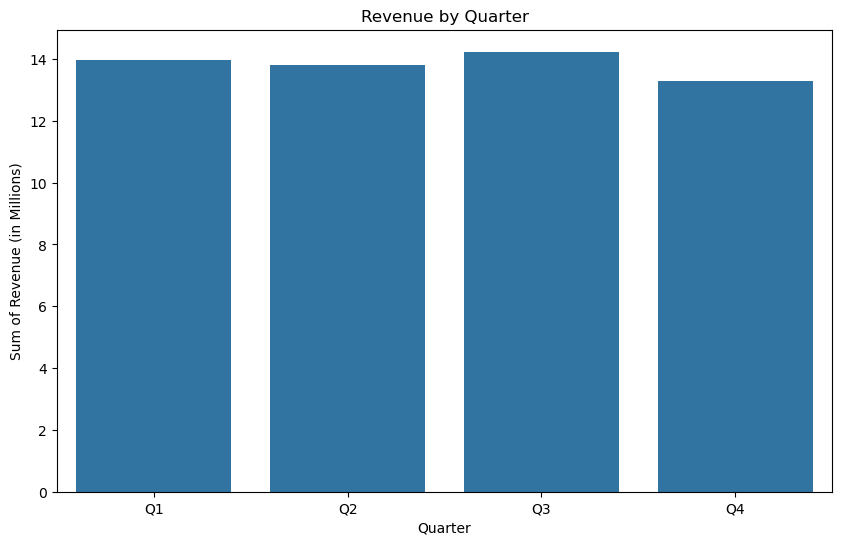

In [105]:
sum_revenue = cc_details.groupby('Qtr')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sum_revenue, x='Qtr', y=sum_revenue['Revenue'] / 1e6)
plt.title('Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sum of Revenue (in Millions)')
plt.show()

### Revenue by Exp Type

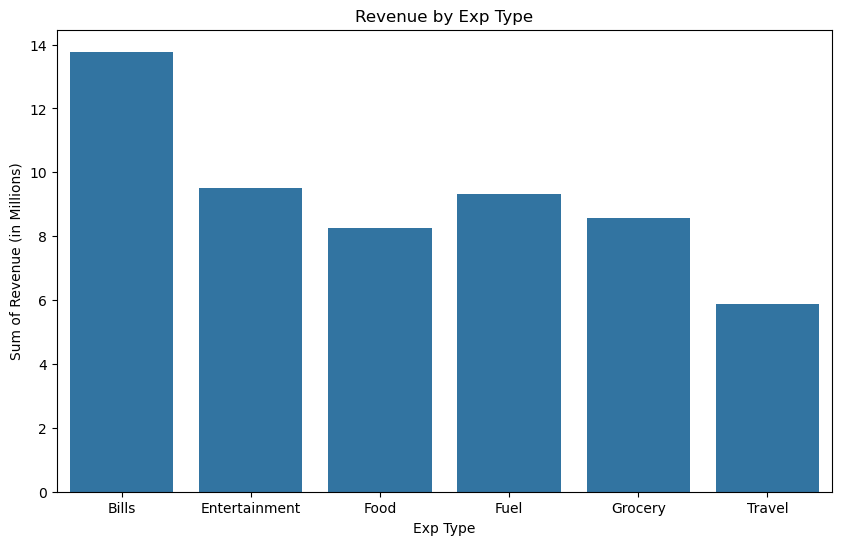

In [99]:
sum_revenue = cc_details.groupby('Exp Type')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sum_revenue, x='Exp Type', y=sum_revenue['Revenue'] / 1e6,palette=None)
plt.title('Revenue by Exp Type')
plt.xlabel('Exp Type')
plt.ylabel('Sum of Revenue (in Millions)')
plt.show()


### *Data visuatisation using Plotly*

### Revenue by Education Level

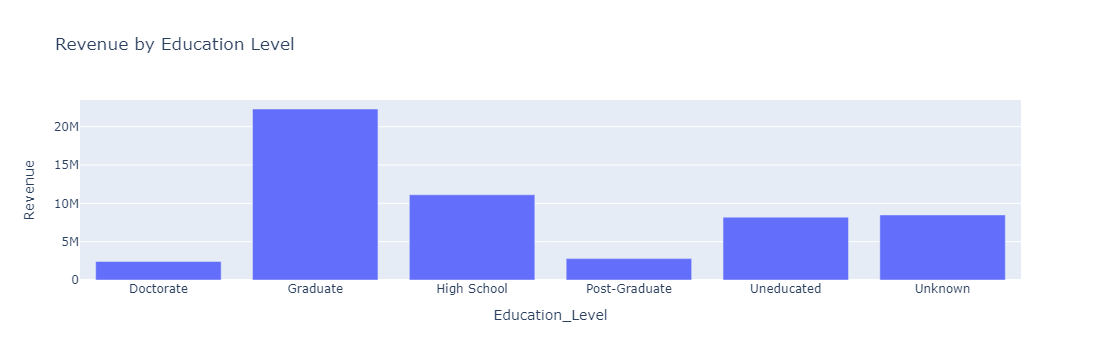

In [102]:
sum_revenue = merged_df.groupby('Education_Level')['Revenue'].sum().reset_index()

fig = px.bar(sum_revenue,x='Education_Level', y='Revenue',title='Revenue by Education Level')
fig.show()

### Revenue by Income

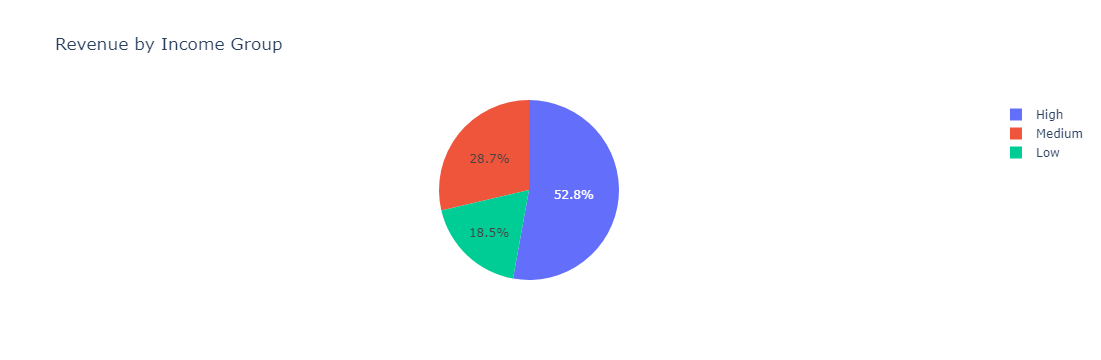

In [104]:
rev_income = merged_df.groupby('Income_Group')['Revenue'].sum().reset_index()

fig = px.pie(rev_income, values='Revenue', names='Income_Group', title='Revenue by Income Group')

# Show the plot
fig.show()

### Revenue by Age Group and Gender

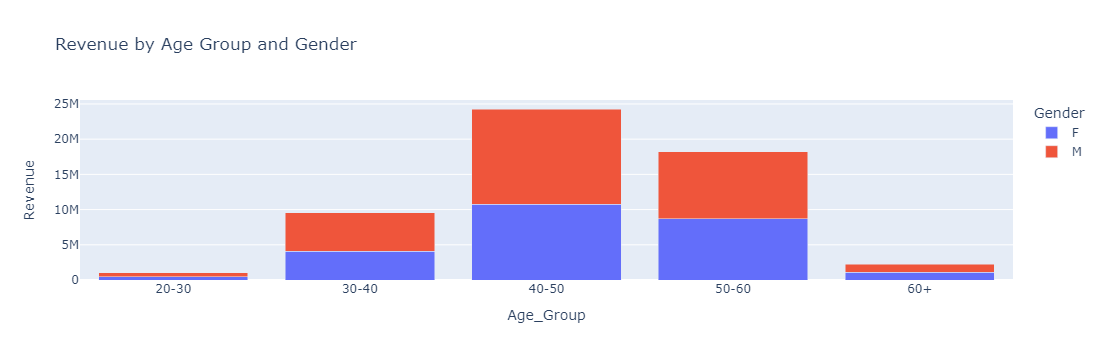

In [107]:
rev_age = merged_df.groupby(['Age_Group','Gender'])['Revenue'].sum().reset_index()

fig = px.bar(rev_age, x='Age_Group', y='Revenue', color='Gender', title='Revenue by Age Group and Gender', barmode='stack')

fig.show()

### Revenue by Customer Job

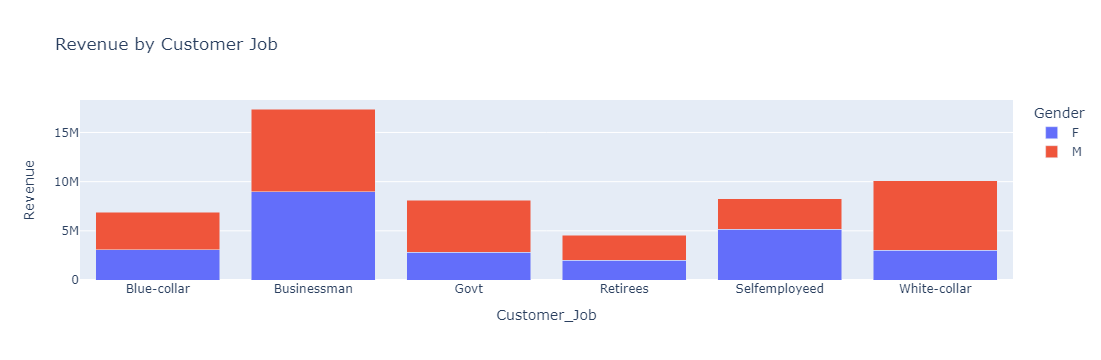

In [171]:
sum_revenue = merged_df.groupby(['Customer_Job','Gender'])['Revenue'].sum().reset_index()

fig = px.bar(sum_revenue,x='Customer_Job', y='Revenue',color='Gender', title='Revenue by Customer Job',barmode='stack')
fig.show()

### Top 5 States by Revenue

In [118]:
#Revenue by State
rev_state = merged_df.groupby('state_cd')['Revenue'].sum().reset_index()
rev_state = rev_state.sort_values(by='Revenue', ascending=False)
top_5_states = rev_state.head(5)

In [120]:
top_5_states

,state_cd,Revenue
24,TX,12809300.67
19,NY,12733454.75
3,CA,12615274.39
6,FL,9690947.18
16,NJ,4245441.70


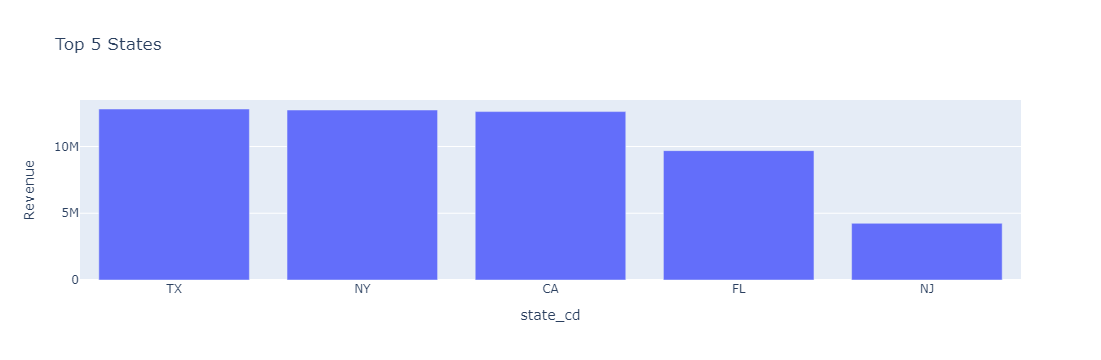

In [122]:
#Plotting
fig = px.bar(top_5_states,x='state_cd', y='Revenue',title='Top 5 States')
fig.show()


### Revenue by Marital Status

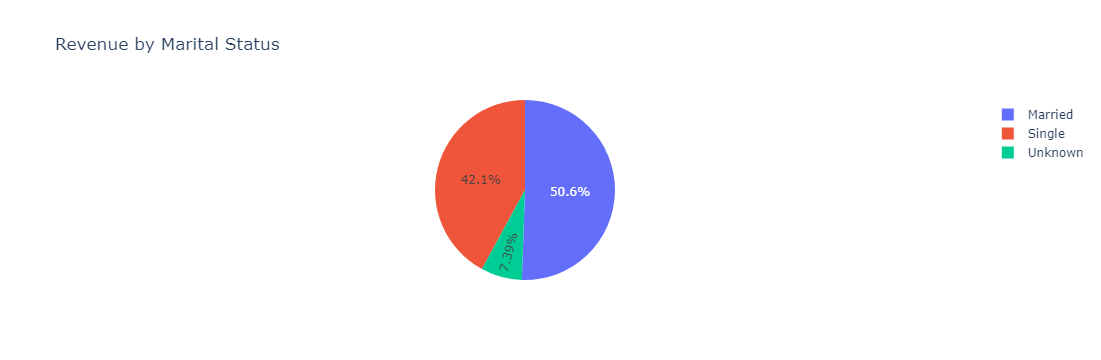

In [124]:
rev_status = merged_df.groupby('Marital_Status')['Revenue'].sum().reset_index()

fig = px.pie(rev_status, values='Revenue', names='Marital_Status', title='Revenue by Marital Status')

fig.show()


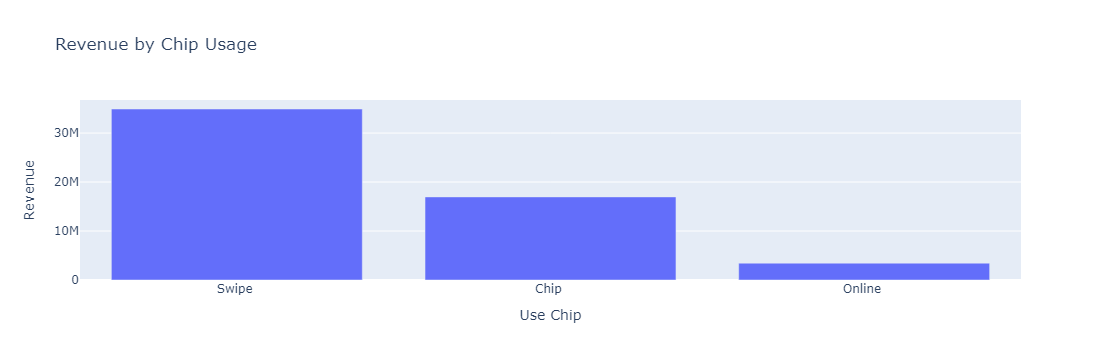

In [157]:
sum_revenue = cc_details.groupby('Use Chip')['Revenue'].sum().reset_index()
sum_revenue = sum_revenue.sort_values(by='Revenue', ascending=False)

fig = px.bar(sum_revenue,x='Use Chip', y='Revenue',title='Revenue by Chip Usage')
fig.show()

### Card Summary

In [121]:
#Table showing Card Category,Sum of Revenue, Sum of total trasaction amount, sum of interst earned
card_summary = cc_details.groupby('Card_Category')[['Revenue','Total_Trans_Amt','Interest_Earned']].sum().reset_index()

In [123]:
card_summary

,Card_Category,Revenue,Total_Trans_Amt,Interest_Earned
0,Blue,46139397.74,36957875,6495887.74
1,Gold,2454072.16,2024078,373784.16
2,Platinum,1135608.05,953314,161629.05
3,Silver,5586332.28,4586746,812081.28


### Revenue by Month

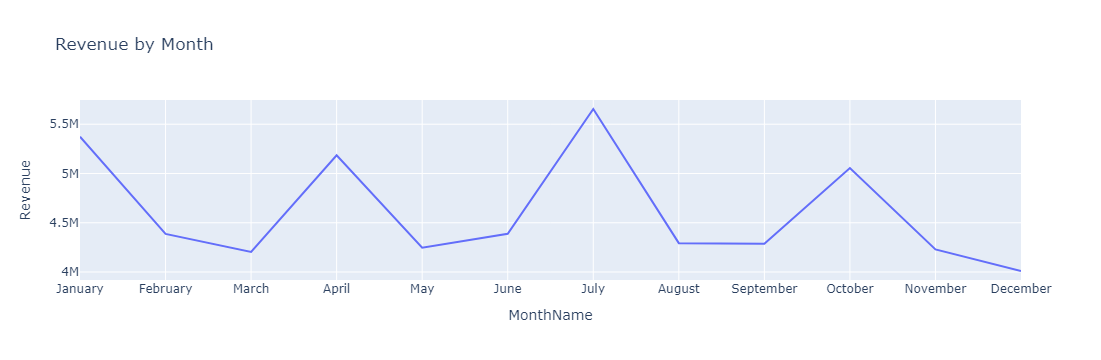

In [121]:
revenue_by_month = cc_details.groupby('Month')['Revenue'].sum().reset_index()

# Convert month names to datetime objects to get the correct order
revenue_by_month['Month'] = pd.to_datetime(revenue_by_month['Month'], format='%B')

# Sort by the datetime objects (this sorts by month in chronological order)
revenue_by_month = revenue_by_month.sort_values(by='Month')

revenue_by_month['MonthName'] = revenue_by_month['Month'].dt.strftime('%B')

fig = px.line(revenue_by_month, x='MonthName', y='Revenue', title='Revenue by Month')

fig.show()

### Week over Week Change

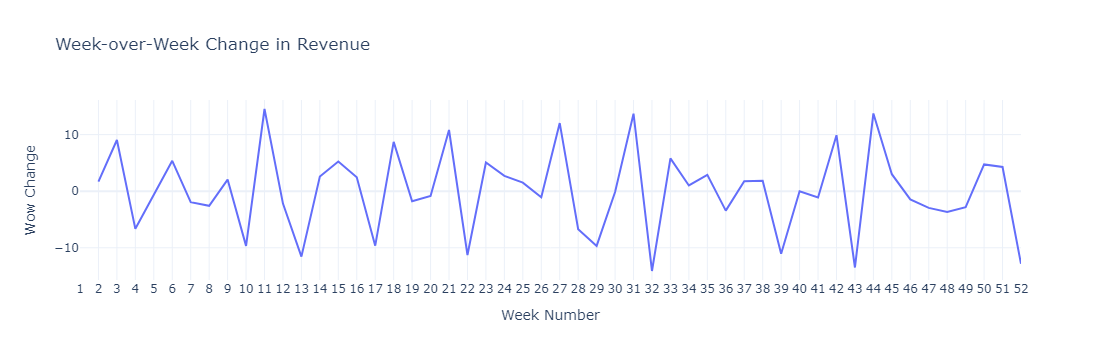

In [204]:
fig = px.line(wow_revenue, x='Week Number', y='WoW_change', title='Week-over-Week Change in Revenue')
fig.update_layout(
    xaxis_title='Week Number',
    yaxis_title='Wow Change',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),  # Show every week
    template='plotly_white'
)
fig.show()

# Project Insights

* Overall revenue is 57M
* Total interest is 8M
* Total transaction amount is 46M
* Male customers are contributing more in revenue 31M, female 26M
* Blue & Silver credit card are contributing to 93% of overall transactions
* TX, NY & CA is contributing to 68%
* Overall Activation rate is 57.5%
* Overall Delinquent rate is 6.06%
